# Comparing 2-Stage Algorithm Player to a Solo Player

In [1]:
import numpy as np
import math
import sys
import ipdb

sys.path.append("../")

sys.path.append("../utils/")
from utils_functions import *

from dd_game import *
from two_stage_player import *
from dfo_player import *
from solo_player import *

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [2]:
np.random.seed(63)

d_1 = 2  # Dimension of each player's data/strategy
d_2 = 2

epsilon_0 = 0.1
epsilon_1 = 1  # Epsilon sensitivity parameters
epsilon_2 = 1

Sigma_x_p1 = np.eye(d_1)  # Covariance of x^k
Sigma_x_p2 = np.eye(d_2)

sigma_y_p1 = 0.1  # Variance of y^k
sigma_y_p2 = 0.1

beta_p1 = np.random.normal(size=d_1)  # Linear parameter vector
beta_p2 = np.random.normal(size=d_2)

# s_1 = sample_sphere(epsilon_1,d_1+d_2)  # Performativity parameters
# mu_p1 = s_1[0:d_1]
# gamma_p1 = s_1[d_1:]
# s_2 = sample_sphere(epsilon_2,d_1+d_2)
# mu_p2 = s_2[0:d_2]
# gamma_p2 = s_2[d_2:]

mu_p1 = sample_sphere(epsilon_0,d_1)
gamma_p1 = sample_sphere(epsilon_1,d_2)
mu_p2 = sample_sphere(epsilon_0,d_2)
gamma_p2 = sample_sphere(epsilon_2,d_1)

p1_data_params = (Sigma_x_p1, sigma_y_p1, beta_p1, mu_p1, gamma_p1)
p1_data_generating_func = sample_from_location_family

p2_data_params = (Sigma_x_p2, sigma_y_p2, beta_p2, mu_p2, gamma_p2)
p2_data_generating_func = sample_from_location_family

# num_rounds_lst = np.logspace(1,5,11,dtype='int')
num_rounds_lst = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]
num_alternate_rounds = 100
num_test = 1000

In [3]:
np.random.seed(63)

p1_risks = []
p2_risks = []
theta_final_p1 = []
theta_final_p2 = []

for num_rounds in num_rounds_lst:
    print(f"num_rounds = {num_rounds}")
    player_one = SoloPlayer()
    player_two = TwoStagePlayer()
    game = DecisionDependentGame(player_one, player_two,
                                 p1_data_params, p2_data_params,
                                 p1_data_generating_func, p2_data_generating_func,
                                 num_rounds, num_alternate_rounds, num_test)
    
    game.run_train()
    game.run_post_train_alternating()
    
    PR1, PR2 = game.evaluate_closed_perf_risk()
    p1_risks.append(PR1)
    p2_risks.append(PR2)
    
    theta_final_p1.append(game.theta_p1)
    theta_final_p2.append(game.theta_p2)
    
    #Change this flag if one wants to change print settings
    if False:
        print("---------------------")
        print("Player 1: Actual mu, gamma")
        print(mu_p1, gamma_p1)
        print("Player 1: Estimated mu, gamma")
        print(player_one.mu_hat, player_one.gamma_hat)

        print("Player 2: Actual mu, gamma")
        print(mu_p2, gamma_p2)
        print("Player 2: Estimated mu, gamma")
        print(player_two.mu_hat, player_two.gamma_hat)
        print("---------------------")

num_rounds = 50
num_rounds = 100
num_rounds = 500
num_rounds = 1000
num_rounds = 5000
num_rounds = 10000
num_rounds = 50000
num_rounds = 100000


In [4]:
np.random.seed(63)

p3_risks = []
p4_risks = []
theta_final_p3 = []
theta_final_p4 = []

for num_rounds in num_rounds_lst:
    print(f"num_rounds = {num_rounds}")
    player_three = TwoStagePlayer()
    player_four = TwoStagePlayer()
    game = DecisionDependentGame(player_three, player_four,
                                 p1_data_params, p2_data_params,
                                 p1_data_generating_func, p2_data_generating_func,
                                 num_rounds, num_alternate_rounds, num_test)
    
    game.run_train()
    game.run_post_train_alternating()
    
    PR3, PR4 = game.evaluate_closed_perf_risk()
    p3_risks.append(PR3)
    p4_risks.append(PR4)
    
    theta_final_p3.append(game.theta_p1)
    theta_final_p4.append(game.theta_p2)
    
    #Change this flag if one wants to change print settings
    if False:
        print("---------------------")
        print("Player 1: Actual mu, gamma")
        print(mu_p1, gamma_p1)
        print("Player 1: Estimated mu, gamma")
        print(player_three.mu_hat, player_three.gamma_hat)

        print("Player 2: Actual mu, gamma")
        print(mu_p2, gamma_p2)
        print("Player 2: Estimated mu, gamma")
        print(player_four.mu_hat, player_four.gamma_hat)
        print("---------------------")

num_rounds = 50
num_rounds = 100
num_rounds = 500
num_rounds = 1000
num_rounds = 5000
num_rounds = 10000
num_rounds = 50000
num_rounds = 100000


In [5]:
theta_PO_1, theta_PO_2 = game.solve_nash()
theta_SO_1, theta_SO_2 = game.solve_social_opt()
theta_final_p1 = np.array(theta_final_p1)
theta_final_p2 = np.array(theta_final_p2)
theta_final_p3 = np.array(theta_final_p3)
theta_final_p4 = np.array(theta_final_p4)

game.theta_p1, game.theta_p2 = game.solve_nash()
PO_1, PO_2 = game.evaluate_closed_perf_risk()
print(f'Player 1 PO = {PO_1.round(3)}\tPlayer 2 PO = {PO_2.round(3)}')

game.theta_p1, game.theta_p2 = game.solve_social_opt()
SO_1, SO_2 = game.evaluate_closed_perf_risk()
print(f'Player 1 SO = {SO_1.round(3)}\tPlayer 2 SO = {SO_2.round(3)}')

Player 1 PO = 0.166	Player 2 PO = 0.467
Player 1 SO = 0.163	Player 2 SO = 0.203


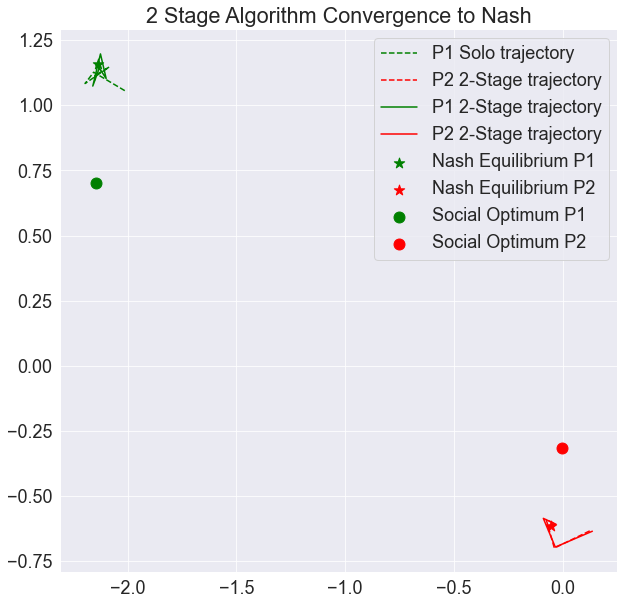

In [6]:
plt.figure(figsize=(10,10))
x_nash_p1 = [theta_PO_1[0]]
y_nash_p1 = [theta_PO_1[1]]
plt.scatter(x_nash_p1, y_nash_p1,
            label='Nash Equilibrium P1', marker='*', color='g', s=120)

x_nash_p2 = theta_PO_2[0]
y_nash_p2 = theta_PO_2[1]
plt.scatter(x_nash_p2,y_nash_p2,
            label='Nash Equilibrium P2', marker='*', color='r', s=120)

x_so_p1 = [theta_SO_1[0]]
y_so_p1 = [theta_SO_1[1]]
plt.scatter(x_so_p1, y_so_p1,
            label='Social Optimum P1', marker='o', color='g', s=120)

x_so_p2 = theta_SO_2[0]
y_so_p2 = theta_SO_2[1]
plt.scatter(x_so_p2,y_so_p2,
            label='Social Optimum P2', marker='o', color='r', s=120)

x1 = theta_final_p1[1:,0]
y1 = theta_final_p1[1:,1]
plt.plot(x1,y1,
         '--', label='P1 Solo trajectory', color='g', markersize=5)

x2 = theta_final_p2[1:,0]
y2 = theta_final_p2[1:,1]
plt.plot(x2,y2,
         '--', label='P2 2-Stage trajectory', color='r', markersize=5)

x3 = theta_final_p3[1:,0]
y3 = theta_final_p3[1:,1]
plt.plot(x3,y3,
         '-', label='P1 2-Stage trajectory', color='g', markersize=5)

x4 = theta_final_p4[1:,0]
y4 = theta_final_p4[1:,1]
plt.plot(x4,y4,
         '-', label='P2 2-Stage trajectory', color='r', markersize=5)

plt.legend()
plt.title("2 Stage Algorithm Convergence to Nash")
plt.savefig('../figures/solo_vs_2stage_trajectory.pdf', format='pdf')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (8,) and (100,)

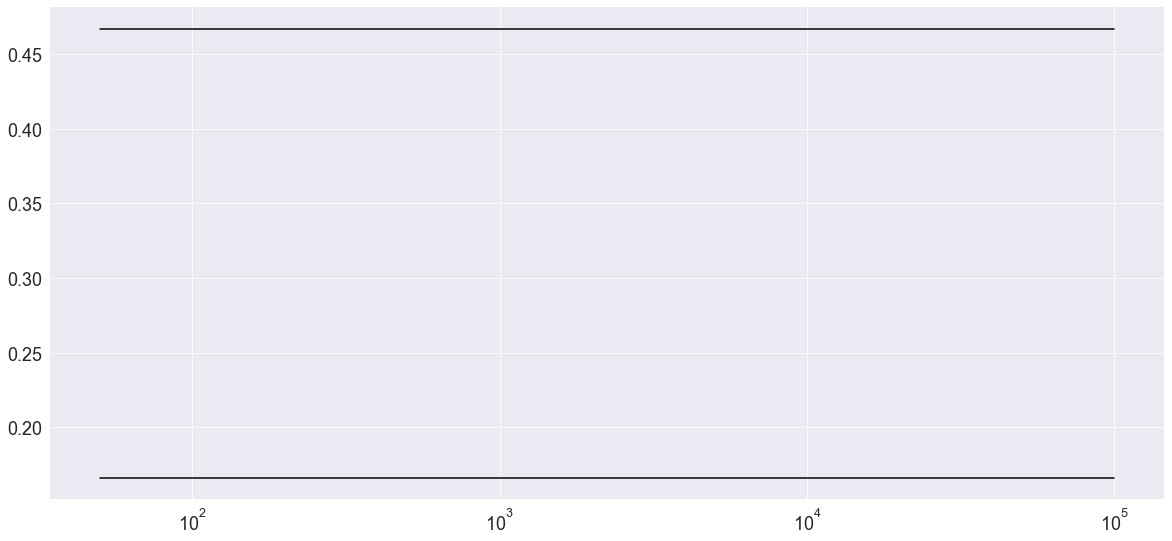

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.semilogx(num_rounds_lst, [PO_1 for i in num_rounds_lst],
             '-', color='k', label='P1 Performative Optimum')
plt.semilogx(num_rounds_lst, [PO_2 for i in num_rounds_lst],
             '-', color='k', label='P2 Performative Optimum') 

plt.semilogx(num_rounds_lst, p1_risks,
             '--', color='#5553E6', label='P1 Solo Performative Risk')
plt.semilogx(num_rounds_lst, p2_risks,
             '--', color='#E07110', label='P2 2S Performative Risk')

plt.semilogx(num_rounds_lst, p3_risks,
             '-', color='#5553E6', label='P1 2S Performative Risk')
plt.semilogx(num_rounds_lst, p4_risks,
             '-', color='#E07110', label='P2 2S Performative Risk')
plt.xlabel("Iterations")
plt.ylabel(r"$PR(\theta)$")
plt.title("Evolution of Performative Risks")
plt.legend(fontsize=14)

plt.subplot(2,1,2)
plt.loglog(num_rounds_lst, [PO_1 for i in num_rounds_lst],
           '-', color='k', label='P1 Performative Optimum')
plt.loglog(num_rounds_lst, [PO_2 for i in num_rounds_lst],
           '-', color='k', label='P2 Performative Optimum')

plt.loglog(num_rounds_lst, p1_risks,
           '--', color='#5553E6', label='P1 Solo Performative Risk')
plt.loglog(num_rounds_lst, p2_risks,
           '--', color='#E07110', label='P2 2S Performative Risk')

plt.loglog(num_rounds_lst, p3_risks,
           '-', color='#5553E6', label='P1 2S Performative Risk')
plt.loglog(num_rounds_lst, p4_risks,
           '-', color='#E07110', label='P2 2S Performative Risk')
plt.ylabel(r"$\log(PR(\theta))$")
plt.savefig('../figures/solo_vs_2stage_convergence.pdf', format='pdf')
plt.tight_layout()
plt.show()

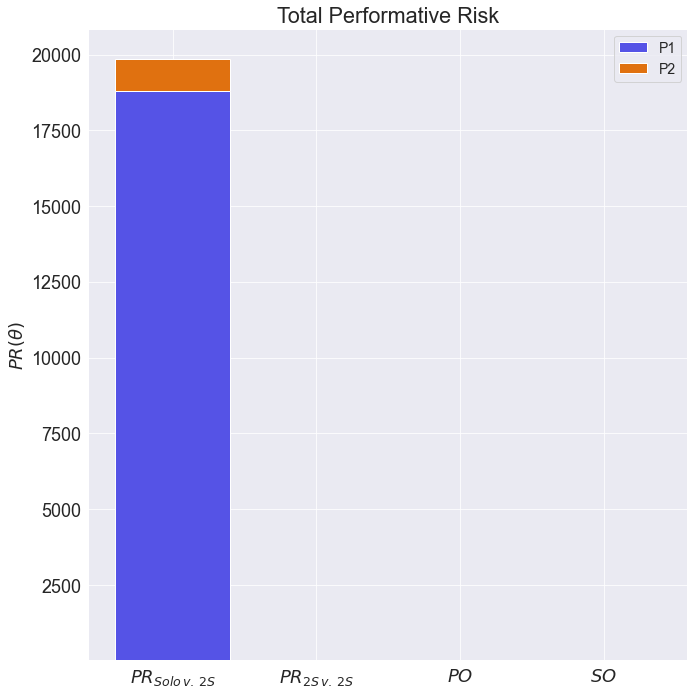

In [12]:
plt.figure(figsize=(10,10))
labels = [r'$PR_{Solo\, v.\, 2S}$', r'$PR_{2S\, v.\, 2S}$', r'$PO$', r'$SO$']
plt.bar((1,2,3,4), (p1_risks[-1],p3_risks[-1],PO_1,SO_1),
        label='P1', tick_label=labels, color='#5553E6')
plt.bar((1,2,3,4), (p2_risks[-1],p4_risks[-1],PO_2,SO_2),
        bottom=(p1_risks[-1],p3_risks[-1],PO_1,SO_1),
        label='P2', color='#E07110')
plt.title('Total Performative Risk')
plt.ylabel(r'$PR(\theta)$')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('../figures/solo_vs_2stage_bar.pdf', format='pdf')
plt.show()

In [44]:
epsilon_ = np.logspace(-2,2,20)
N = 1
num_rounds = 10000
solo_risk_avg = []
two_stage_risk_avg = []
solo_var = []
two_stage_var = []
solo_low = []
solo_high = []
two_stage_low = []
two_stage_high = []
diff_avg = []
diff_low = []
diff_high = []

for epsilon in epsilon_:
    print(f'epsilon = {epsilon}')
    p1_risks = []
    p2_risks = []
    diff = []
    for n in range(N):
        epsilon_0 = 0.0*np.random.randn()
        beta_p1 = np.random.normal(size=d_1)  # Linear parameter vector
        beta_p2 = np.random.normal(size=d_2)

        mu_p1 = sample_sphere(epsilon_0,d_1)
        gamma_p1 = sample_sphere(epsilon,d_2)
        mu_p2 = sample_sphere(epsilon_0,d_2)
        gamma_p2 = sample_sphere(epsilon,d_1)

        p1_data_params = (Sigma_x_p1, sigma_y_p1, beta_p1, mu_p1, gamma_p1)
        p1_data_generating_func = sample_from_location_family

        p2_data_params = (Sigma_x_p2, sigma_y_p2, beta_p2, mu_p2, gamma_p2)
        p2_data_generating_func = sample_from_location_family

        player_one = SoloPlayer()
        player_two = TwoStagePlayer()
        game = DecisionDependentGame(player_one, player_two,
                                     p1_data_params, p2_data_params,
                                     p1_data_generating_func, p2_data_generating_func,
                                     num_rounds, num_alternate_rounds, num_test)

        game.run_train()
        game.run_post_train_alternating()

        PR1, PR2 = game.evaluate_closed_perf_risk()
        p1_risks.append(PR1)
        p2_risks.append(PR2)
        diff.append(PR2-PR1)
        
        
    solo_risk_avg.append(np.mean(p1_risks))
    solo_var.append(np.var(p1_risks))
    solo_low.append(np.sort(p1_risks)[math.floor(N*0.05)])
    solo_high.append(np.sort(p1_risks)[-math.ceil(N*0.05)])
    
    two_stage_risk_avg.append(np.mean(p2_risks))
    two_stage_var.append(np.var(p2_risks))
    two_stage_low.append(np.sort(p2_risks)[math.floor(N*0.05)])
    two_stage_high.append(np.sort(p2_risks)[-math.ceil(N*0.05)])
    
    diff_avg.append(np.mean(diff))
    diff_low.append(np.sort(diff)[math.floor(N*0.05)])
    diff_high.append(np.sort(diff)[-math.ceil(N*0.05)])

epsilon = 0.01
epsilon = 0.016237767391887217
epsilon = 0.026366508987303583
epsilon = 0.04281332398719394
epsilon = 0.06951927961775606
epsilon = 0.11288378916846889
epsilon = 0.18329807108324356
epsilon = 0.29763514416313175
epsilon = 0.4832930238571752
epsilon = 0.7847599703514611
epsilon = 1.2742749857031335
epsilon = 2.06913808111479
epsilon = 3.359818286283781
epsilon = 5.455594781168514
epsilon = 8.858667904100823
epsilon = 14.38449888287663
epsilon = 23.357214690901213
epsilon = 37.92690190732246
epsilon = 61.584821106602604
epsilon = 100.0


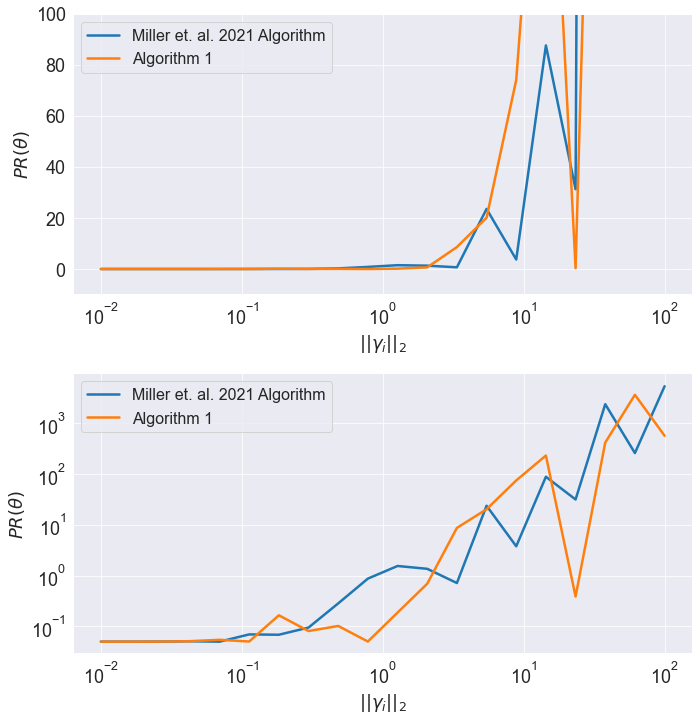

In [45]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.semilogx(epsilon_, solo_risk_avg, lw=2.5, label='Miller et. al. 2021 Algorithm')
plt.fill_between(epsilon_, solo_low, solo_high, alpha=0.3)
plt.semilogx(epsilon_, two_stage_risk_avg, lw=2.5, label='Algorithm 1')
plt.fill_between(epsilon_, two_stage_low, two_stage_high, alpha=0.3)
plt.ylim(-10, 100) 
plt.legend(fontsize=16,loc='upper left')
plt.ylabel(r'$PR(\theta)$')
plt.xlabel(r'$||\gamma_i||_2$')
plt.subplot(2,1,2)
plt.loglog(epsilon_, solo_risk_avg, lw=2.5, label='Miller et. al. 2021 Algorithm')
plt.fill_between(epsilon_, solo_low, solo_high, alpha=0.3)
plt.loglog(epsilon_, two_stage_risk_avg, lw=2.5, label='Algorithm 1')
plt.fill_between(epsilon_, two_stage_low, two_stage_high, alpha=0.3)
plt.legend(fontsize=16,loc='upper left')
plt.tight_layout()
plt.ylabel(r'$PR(\theta)$')
plt.xlabel(r'$||\gamma_i||_2$')
plt.savefig('../figures/solo_vs_2stage_risk.pdf', format='pdf')
plt.show()

(-1000.0, 1000.0)

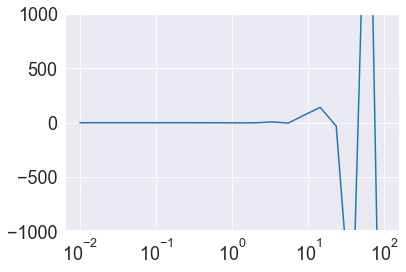

In [46]:
plt.figure()
plt.semilogx(epsilon_,diff_avg)
plt.fill_between(epsilon_, diff_low, diff_high, alpha=0.3)
plt.ylim(-1000, 1000) 